<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/AccuracyIsNotEnough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW TO EVALUATE A CLASSIFIER TRAINED WITH AN IMBALANCED DATASET? WHY ACCURACY IS NOT ENOUGH?
**Author:** [Murat Karakaya](https://www.linkedin.com/in/muratkarakaya/)<br>
**Date created:** 19 May 2020<br>
**Last modified:** 25 Nov 2021<br>
**Description:** In this tutorial we will learn 
how to select ***THE BEST*** classification Machine Learning algorithm **among 8 alternative models** using and understanding the **various classification metrics**, especially, when you have an **imbalanced dataset**. We will implement the solutions by Python and SciKit Learn library.
<br>

**Accessible on:**
* [Murat Karakaya Akademi YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA) in [English](https://youtube.com/playlist?list=PLQflnv_s49v-RGv6jb_sFOb_of9VOEpKG) or [Turkish](https://youtu.be/pJqt5hr4Hs4)
* [Medium](https://kmkarakaya.medium.com/how-to-evaluate-a-classifier-trained-with-an-imbalanced-dataset-why-accuracy-is-not-enough-e7d89a391de6)
* [Google Colab](https://colab.research.google.com/drive/1xB0Rz_ZGBIhH3q_teHJFDt-8smG57F7y?usp=sharing)
* [Kaggle](https://www.kaggle.com/kmkarakaya/why-accuracy-is-not-enough) 
* [GITHUB](https://github.com/kmkarakaya/ML_tutorials/blob/master/AccuracyIsNotEnough.ipynb)
* [Github pages](https://kmkarakaya.github.io/Deep-Learning-Tutorials/)
* [Github Repo](https://github.com/kmkarakaya/Deep-Learning-Tutorials)





# Parts

I will deliver the content in 3 parts:
* **Part A:** Fundamentals, Metrics, Synthetic Dataset
* **Part B:** Dummy Classifiers, Accuracy, Precision, Recall, F1
* **Part C:** ROC, AUC, Worthless Test, Setting up threshold


# **Part A: Fundamentals, Metrics, Synthetic Dataset**


# The Scope:

At the end of the tutorial, we will learn the **answers** of these questions:
* what is an **imbalanced** dataset
* what is a **dummy** classifier
* how to **measure the performance** of a **binary** classifier
* how to **compare** the performances of classification algorithms
* which **metrics** are **meaningful** which is **useless**
* how to **interpret** the metric scores or graphics
* why "**accuracy**" is not a good metric
* why a **fixed threshold** value is **not** useful
* why 99% **accuracy** is ***not*** enough
* why ***accuracy*** is ***not*** a good performance metric in ***some*** classification tasks
* what about **recall, precision & f1**
* how to interpret **roc & auc**
* which classifier is ***better*** among the alternatives
* how to create a **random binary classification dataset** by SciKit Learn


Furthermore, we will cover the following **classification metrics** and the **related concepts** in detail:
* Accuracy
* Recall
* Precision
* F1
* ROC
* ROC AUC
* predit()
* predict_proba()
* threshold

# Definitions

* **Synthetic data** is information that's ***artificially*** manufactured rather than generated by real-world events. Synthetic data is created algorithmically, and it is used as a stand-in for test datasets of production or operational data, to validate mathematical models and, increasingly, to train machine learning models.

* **Imbalanced datasets** are a special case for classification problem where the class distribution is ***not uniform*** among the classes. That is, a classification data set with **skewed class proportions** is called imbalanced. Classes that make up a large proportion of the data set are called ***majority classes***. Those that make up a smaller proportion are ***minority classes***.

* **Performance metrics**, for classification problems, involve ***comparing*** the *expected* class label to the *predicted* class label or ***interpreting*** the predicted probabilities for the class labels for the problem.

* Classification **accuracy** is ***the number of correct predictions divided by the total number of predictions***.

* **Recall** is ***the number of correct positive class predictions divided by the total number of positive samples*** in the dataset.

* **Precision** is ***the number of positive class predictions divided by the number of samples actually belong to the positive class***.

* **F-Measure** (score) is a single score that balances both the precision and recall in one number.

* **Sensitivity** or **True Positive Rate (TPR)**, also known as recall, is ***the number of correct positive class predictions divided by the total number of positive samples***. (probability of detection)

* **False Positive Rate (FPR)** is ***the number of samples incorrectly predicted as positive divided by the total number of positive samples***. (probability of false alarm)

* **A receiver operating characteristic (ROC) curve**  is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination ***threshold is varied***. The ROC curve is created by **plotting** the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

* **The Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as **a summary of the ROC curve**. 




# Sample Problem and Dataset: Predict the Covid-19 test result
**Assume that:**
* You have collected test data and test results for COVID-19 world-wide

* You know 20 features about all tested subject

* Test result **"0: Negative"** means that person **is healthy**

* Test result **"1: Positive"** means that person **is unfortunately sick (COVID-19)**

* **Our aim** is to train a ***classifier*** which can most accurately predict the test results using 20 features.

But, first, let's examine the results from the below figure:


[**How many tests to find one COVID-19 case?**](https://ourworldindata.org/covid-testing#source-information-country-by-country)	

![Corona Tests per positive](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/coronaTests.png?raw=true)


* What you can notice is that  **detecting/observing** a corona case (positive) per test has a **very low probability** changing from **0.005 to 0.14**. 

* The top 5 country average is (5/607) **0.008**! 

That is, we can continue the above assumptions by adding these ones:
*  you collected COVID-19 testing results into a data set, 
* in that data set,  **99.2%** of the test results would be **"0: Negative"** and **0.8%** would be **"1: Positive"**.




Using these assumptions, below, we will generate a **synthetic** dataset following the positive/negative test distribution.

After then, we will train 8 different models and compare their performance with various metrics.

**In the end**, 
* we will understand why the **accuracy** metric is not suitable for classification tasks with imbalanced datasets. 
* we will recognize the importance of **other metrics** such as ***F1, ROC, AUC***, etc.


# Import dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd

# Function to create a synthetic binary classification dataset with  specific class distributions
* We will use Scikit Learn **[make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)** function with  **weights** parameter which is the proportions of samples assigned to each class. 



In [2]:
def makeDataset(size= 1000, negativeClassDistribution=0.5):
  print("Created a random binary dataset with class disributions:")
  # generate 2 class dataset
  X, y = make_classification(n_samples=size, n_classes=2, 
                             weights=[negativeClassDistribution], 
                             random_state=42)
  print( "class 0 (negative class):{:.2f}% vs class 1 (positive class):{:.2f}% "
                        .format(len(y[y==0])/size*100, len(y[y==1])/size*100))
  print("X shape: ", X.shape, "y shape: ",y.shape)
  print("Five Sample input (X) and output values (y):")
  print("X: ")
  print(pd.DataFrame(X).head())
  print("y: ")
  print(pd.DataFrame(y).head())
  
  # split into train/test sets
  return train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)


Let's create a **synthetic** dataset for a given negative class distribution:

Created a random binary dataset with class disributions:
class 0 (negative class):98.85% vs class 1 (positive class):1.15% 
X shape:  (2000, 20) y shape:  (2000,)
Five Sample input (X) and output values (y):
X: 
         0         1         2   ...        17        18        19
0  0.231462  1.463082  1.162261  ... -1.663666 -1.407211  3.942331
1  0.522972  0.591132 -0.958704  ...  1.476500  1.873576  1.820967
2 -0.131981  2.935407 -1.633437  ...  2.865920  0.927649  0.983906
3  0.631804  0.043830  1.203177  ...  0.702331  0.467378 -0.047347
4  1.475454 -0.572854 -1.159536  ... -0.464967  0.809846 -0.280024

[5 rows x 20 columns]
y: 
   0
0  0
1  0
2  0
3  0
4  0
y histogram: 
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3435edcbd0>]]


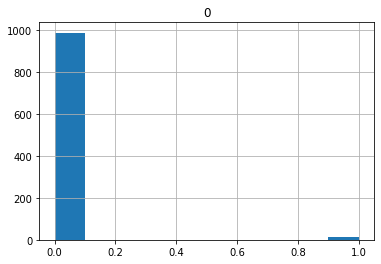

In [3]:
trainX, testX, trainy, testy = makeDataset(size= 2000, negativeClassDistribution = 0.992)
print("y histogram: ")
print(pd.DataFrame(testy).hist())

# **Part B: Dummy Classifiers, Accuracy, Precision, Recall, F1**


# Function to create Dummy Classifiers
* We will use the SciKit Learn **[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)** method which is a classifier that makes predictions using **simple rules**.

* This classifier is useful as a **simple baseline** to compare with other (real) classifiers. 

* **Do not use it for real problems**.



## Function Prototype

class sklearn.dummy.DummyClassifier( **strategy**='warn', random_state=None, **constant**=None)



## Parameters: **strategy** 

default="stratified". Strategy to use to generate predictions.

* **“stratified”**: generates **predictions** by respecting the training set’s **class distribution**.

* **“most_frequent”**: **always predicts** the **most frequent** label in the training set.

* **“prior”**: **always predicts** the class that **maximizes the class prior** (like “most_frequent”) and **predict_proba returns the class prior**.

* **“uniform”**: generates **predictions** uniformly at **random**.

* **“constant”**: always **predicts a constant label** that is provided by the user. This is useful for metrics that evaluate a non-majority class


In [4]:
def Dummy(strategy, ax=None, constant=0, showReport=False):
  # no skill model, stratified random class predictions
  model = DummyClassifier(strategy=strategy, constant=constant)
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)
  label='DummyClassifier ('+str(strategy)+')'
  if (strategy=='constant'):    
    label=label+' '+str(constant)
  print(label)
  if showReport:
    print(classification_report(testy, model.predict(testX)))
  else:
    print("accuracy_score {:.2f}%".format(100*accuracy_score(testy, model.predict(testX))))
  
  if ax is not None:
    # retrieve just the probabilities for the positive class
    pos_probs = yhat[:, 1]
    # calculate roc auc
    roc_auc = roc_auc_score(testy, pos_probs)
    #print("testy, pos_probs: ", testy, pos_probs)

    # calculate roc curve for model
    fpr, tpr,threshold = roc_curve(testy, pos_probs)
    #print(" fpr, tpr, threshold", fpr, tpr, threshold)
    # plot model roc curve
    
    ax.set_title('{} ROC AUC {:.3f}'.format(label, roc_auc))  
    ax.plot(fpr, tpr, marker='.', label=label)
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
  return ax


# Function to use KNN and Logistic Regression classifiers as skillful classifiers 


In [5]:
def SkilFul(model, ax=None,   showReport= False, return_tresholds = False):
  # skilled model
  label=str(model)[:15]
  print("A skilled model: "+ label)
  model = model
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)

  if showReport:
    print(classification_report(testy, model.predict(testX)))
  else:
    print("accuracy_score {:.2f}%".format(100*accuracy_score(testy, model.predict(testX))))


  # retrieve just the probabilities for the positive class
  # The binary case expects a shape (n_samples,), and the scores must be the scores of  
  # the class with the greater label.
  pos_probs = yhat[:, 1]
  #print("yhat \n", yhat.shape)
  # calculate roc auc
  roc_auc = roc_auc_score(testy, pos_probs)
  #print('Logistic ROC AUC %.3f' % roc_auc)

  # calculate roc curve for model
  fpr, tpr, threshold = roc_curve(testy, pos_probs)
  #print(" fpr, tpr, threshold", fpr, tpr, threshold)
  if ax is not None:
    
    # plot model roc curve
    ax.plot(fpr, tpr, marker='.', label=label)

    ax.set_title('{} ROC AUC {:.3f}'.format(label, roc_auc))  
    
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
  if return_tresholds:
    return ax,fpr, tpr, threshold
  else:
    return ax

# "Accuracy" score for all 8 classifiers

In [6]:
Dummy('stratified')
Dummy('most_frequent')
Dummy('prior')
Dummy('uniform')
Dummy('constant', constant=0)
Dummy('constant', constant=1)
SkilFul(model=LogisticRegression())
SkilFul(model=KNeighborsClassifier())

DummyClassifier (stratified)
accuracy_score 97.00%
DummyClassifier (most_frequent)
accuracy_score 98.90%
DummyClassifier (prior)
accuracy_score 98.90%
DummyClassifier (uniform)
accuracy_score 46.70%
DummyClassifier (constant) 0
accuracy_score 98.90%
DummyClassifier (constant) 1
accuracy_score 1.10%
A skilled model: LogisticRegress
accuracy_score 99.00%
A skilled model: KNeighborsClass
accuracy_score 98.90%


## Observations

* All the classifiers, except DummyClassifier (uniform) & DummyClassifier (constant) 1, achive very high accuracy scores (>97%)!
* ***DummyClassifier (uniform)*** yields an accuracy of 53.10% whereas ***DummyClassifier (constant) 1*** produces only 1.30% accuracy, as expected.

## Question:
Do you think if we can use all other classifiers in prediction of positive samples, since they have **very high accuracy**?

Keep your answer in your mind for a moment, and let's see more results for various metrics :)

# More metrics, More Insight: Precision, Recall, F1 

We can observe more metrics by using the **SciKit Learn [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)** method.

Before investigating the results remember that there are only **11 positive case (1)** in the test dataset and our aim is to detect possible patients!

So notice the **recall** values in the reports to understand how many of the positive cases are predicted correctly by looking the second line of each report


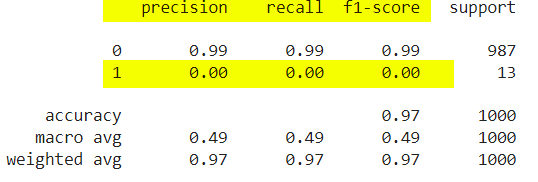

In [7]:
Dummy('stratified',  showReport= True)
Dummy('most_frequent',  showReport= True)
Dummy('prior',  showReport= True)
Dummy('uniform',  showReport= True)
Dummy('constant',  constant=0, showReport= True)
Dummy('constant',  constant=1, showReport= True)
SkilFul(model=LogisticRegression(), showReport= True)
SkilFul(model=KNeighborsClassifier(), showReport= True)

DummyClassifier (stratified)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       989
           1       0.00      0.00      0.00        11

    accuracy                           0.98      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.98      0.98      0.98      1000

DummyClassifier (most_frequent)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.98      0.99      0.98      1000

DummyClassifier (prior)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50

## Observations
* All the classifiers except **DummyClassifier (uniform)** & **DummyClassifier (constant) 1** are not able to recall (detect) any positive cases at all!
* **DummyClassifier (constant) 1** recalls all the positive cases, as expected. Since **DummyClassifier (constant) 1** ***always*** predicts 1! Thus, according to **DummyClassifier (constant) 1**, every tested person is positive :)
* **DummyClassifier (uniform)** recalls the 0.08% of the positive cases. That is **DummyClassifier (uniform)** correctly classify ***only 1 positive case*** (0.08 * 13 = 1.04) out of 13!



## Repeated Question:
Do you think if we can use any of these classifiers in prediction of positive samples, since they have **very high accuracy**?

## New Question:
Do you think if we can use any of these classifiers in prediction of positive samples, since they have **very high average F1 score**?

## Harder Question:
Do you think **which classifier** is better for our goal with respect to **which metric**?

Again, keep your answer in your mind for a moment, and let's see more results for various metrics :)

# **Part C: ROC, AUC, Worthless Test, Setting up threshold**

# Receiver Operator Curve (ROC) & Area Under Curve (AUC)

**Important Reminders**

So far, for any classifier, the **threshold** value is **fixed at 0.5** for deciding a class label
* That is, the  **class label** is decided as **"0"** if the **class probability** is less than 0.5 
* The **class label** is decided as **"1"** if the **class probability** is greater than or equal to 0.5 

**In ROC metric** we try **all possible threshold values** for class probabilities to decide class labels
* In ROC, for each possible threshold value, we calculate the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** values and draw their values on a plot: the ROC plot
* In the ROC plot, these TPR & FPR pairs generate a curve and we can calculate the **Area Under Curve (AUC)**. 
* The **AUC score** gives an **average performance** of the classifier when ***all possible threshold values are considered***

Let's see:



DummyClassifier (stratified)
accuracy_score 97.80%
DummyClassifier (most_frequent)
accuracy_score 98.90%
DummyClassifier (prior)
accuracy_score 98.90%
DummyClassifier (uniform)
accuracy_score 50.70%
DummyClassifier (constant) 0
accuracy_score 98.90%
DummyClassifier (constant) 1
accuracy_score 1.10%
A skilled model: LogisticRegress
accuracy_score 99.00%
A skilled model: KNeighborsClass
accuracy_score 98.90%


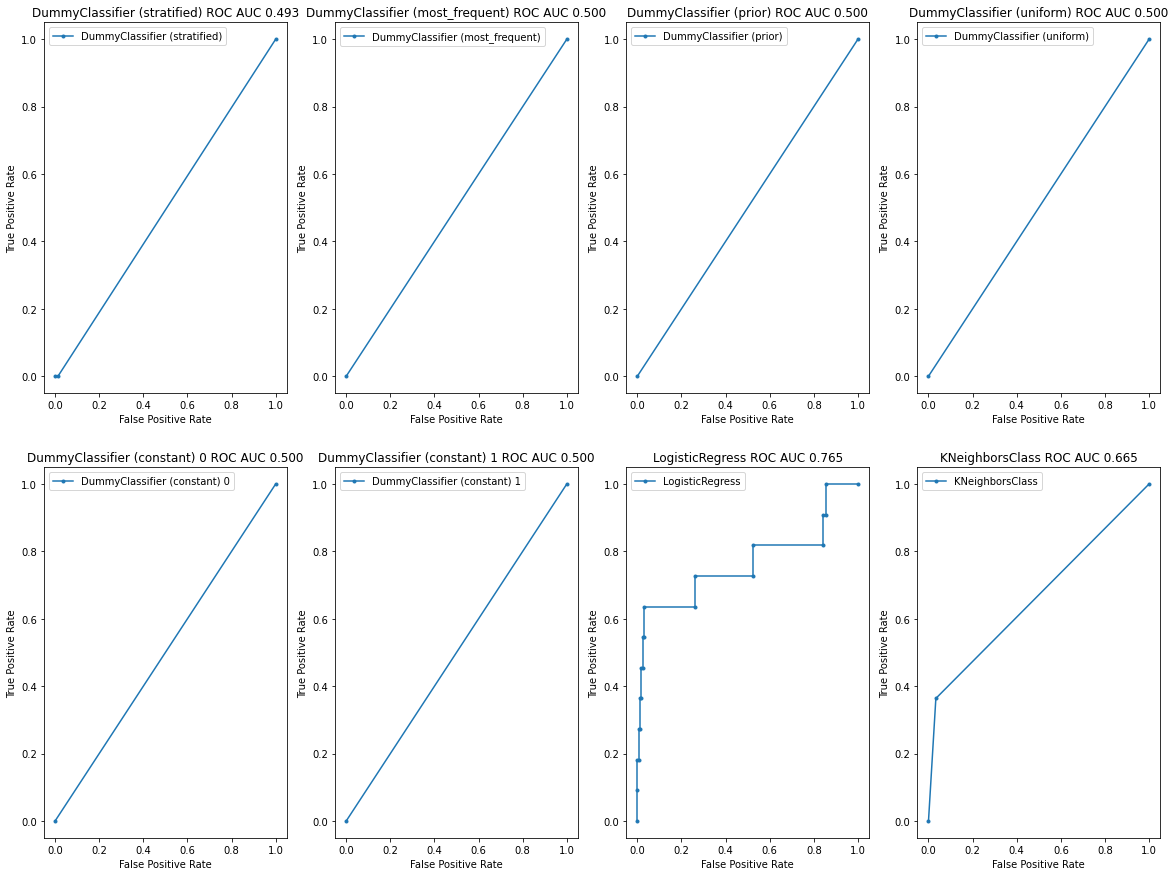

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
Dummy('stratified', axes[0][0])
Dummy('most_frequent', axes[0][1])
Dummy('prior', axes[0][2])
Dummy('uniform', axes[0][3])
Dummy('constant', axes[1][0], constant=0)
Dummy('constant', axes[1][1], constant=1)
SkilFul(model=LogisticRegression(),ax=axes[1][2])
SkilFul(model=KNeighborsClassifier(),ax=axes[1][3])

plt.show()

# NOTE: THE WORTHLESS TEST
* When we have a complete overlap between the results from the positive and the results from the negative population, we have **a worthless test**. 

* A worthless test has a discriminating ability equal to **flipping a coin**.

* The **ROC curve** of the **worthless test** falls on the **diagonal line**. It includes the point with 50 % sensitivity and 50 % specificity. The area under the ROC curve (**ROC AUC**) of the worthless test is **0.5**.

# Categorization of ROC curves
* As a rule of thumb, the categorizations in the below table can be used to describe a ROC curve.

![Categorization of ROC curves](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/TABLE%20IV%20Categorization%20of%20ROC%20curves.gif?raw=true)

## Observations
* All the classifiers except **LogisticRegress** & **KNeighborsClass** have 0.5. the area under the ROC curve (ROC AUC) score. That is, they are the worthless tests. They are useless!
 
* **LogisticRegress** has 0.837 ROC AUC score. According to the above table, it is a good classifier for the given dataset!

* **KNeighborsClass** has 0.563 ROC AUC score. According to the above table, it is not a good classifier for the given dataset!




## New Question:
Do you think if we can use the **LogisticRegress** classifier in prediction of positive samples, since it has a **high ROC AUC score**?

Remember that, according to the previous classification reports, the **LogisticRegress** classifier has not been able to detect a single positive case!

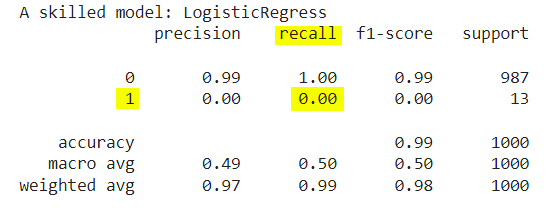

## Important Question:
So, why does the **LogisticRegress** classifier have a **high ROC AUC score**?

## Answer:
* Remember that the above **classification report** is produced assuming that if the **predicted class probability** is **less than 0.5 threshold value**, the predicted label becomes **0:Negative**, ***else*** **1:Positive**!

* However, in calculation of the ROC AUC score, we care about **all possible threshold values**! 

* That is, there are **some threshold values** at which  the **LogisticRegress** classifier can predict positive cases **correctly**!

Please continue with the following code:



In [9]:
  model= LogisticRegression()
  label=str(model)[:15]
  print("A skilled model: "+ label)
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)
  pos_probs = yhat[:, 1]
  print(classification_report(testy, model.predict(testX)))
  for threshold in np.linspace(0,1,11):
    print("{} tests considered to be POSITIVE when threshold is {:.1} "
    .format(len(pos_probs[pos_probs>=threshold]),threshold))

A skilled model: LogisticRegress
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       1.00      0.09      0.17        11

    accuracy                           0.99      1000
   macro avg       0.99      0.55      0.58      1000
weighted avg       0.99      0.99      0.99      1000

1000 tests considered to be POSITIVE when threshold is 0e+00 
21 tests considered to be POSITIVE when threshold is 0.1 
6 tests considered to be POSITIVE when threshold is 0.2 
2 tests considered to be POSITIVE when threshold is 0.3 
1 tests considered to be POSITIVE when threshold is 0.4 
1 tests considered to be POSITIVE when threshold is 0.5 
1 tests considered to be POSITIVE when threshold is 0.6 
1 tests considered to be POSITIVE when threshold is 0.7 
1 tests considered to be POSITIVE when threshold is 0.8 
0 tests considered to be POSITIVE when threshold is 0.9 
0 tests considered to be POSITIVE when threshold is 1e+00 


Above, you can see that by **changing** ***threshold values*** from 0.1 to 1.0, you can end up with different prediction results for positive class!

Actually, you can use the **ROC curve** information to locate ***a specific threshold*** value which provides you better recall value for the positive class.

Below, we will observe the TPR and FPR values for the calculated thresholds:



In [10]:
# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
#print('Logistic ROC AUC %.3f' % roc_auc)

# calculate roc curve for model
fpr, tpr, threshold = roc_curve(testy, pos_probs)
print("threshold:","\ttpr: ", "\tfpr")
for current_threshold,current_tpr, current_fpr in zip(threshold,tpr,fpr):
  print("%.3f" %current_threshold,  "\t\t%.3f" %current_tpr,  "\t%.3f"%current_fpr)
  

threshold: 	tpr:  	fpr
1.860 		0.000 	0.000
0.860 		0.091 	0.000
0.311 		0.182 	0.000
0.162 		0.182 	0.009
0.160 		0.273 	0.009
0.138 		0.273 	0.012
0.119 		0.364 	0.012
0.098 		0.364 	0.018
0.092 		0.455 	0.018
0.070 		0.455 	0.027
0.067 		0.545 	0.027
0.061 		0.545 	0.030
0.055 		0.636 	0.030
0.008 		0.636 	0.263
0.007 		0.727 	0.263
0.002 		0.727 	0.525
0.002 		0.818 	0.525
0.000 		0.818 	0.842
0.000 		0.909 	0.842
0.000 		0.909 	0.854
0.000 		1.000 	0.854
0.000 		1.000 	1.000


As you notice from the results above, 
* For **different threshold** values, the model predictions end up with **different TPR and FPR**.
* While **decreasing the threshold values**, ***TPR and FPR increase***. 
* That is, with **lower values of threshold**, with even a low class probability, we decide that it is **a positive class** prediction which increases the TPR (recall) and FPR as well.

**According to the problem at hand**, you can ***trade off*** TPR and FPR scores. 

Below, we will **decrease the threshold down to 0.160** and report the classification metrics:


In [11]:
print("classification report when threshold is default (0.5)")
print(classification_report(testy, model.predict(testX)))
new_threshold=0.160
print("classification report when threshold is changed to ",new_threshold)
y_pred = (model.predict_proba(testX)[:,1] >= new_threshold).astype(bool) 
print(classification_report(testy,y_pred))

classification report when threshold is default (0.5)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       1.00      0.09      0.17        11

    accuracy                           0.99      1000
   macro avg       0.99      0.55      0.58      1000
weighted avg       0.99      0.99      0.99      1000

classification report when threshold is changed to  0.16
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       989
           1       0.25      0.27      0.26        11

    accuracy                           0.98      1000
   macro avg       0.62      0.63      0.63      1000
weighted avg       0.98      0.98      0.98      1000



According to above results, when we **decrease the threshold**:
* For the 1:Positive class, we observe **a higher recall** (+18%) but **lower precision** value (-75%), as expected.
* **Accuracy is decreased** a little bit: only 1%
* ***Macro average F1*** is **increased** (5%) whereas ***Weighted Avgerage F1*** is **decreased** (1%)

You can select **different threshold** values and observe similar impacts on the results.

If your aim is to **increase** the positive class's **TPR**, you can **compromise** from **FPR** of the positive class.  

# Conclusions

* Accuracy is **NOT** always a good metric for **classification**, esp. if there exists **class imbalanced** data set

* **Classification report** provides details of other metrics: **Precision, Recal and F1** with **averaging over classes** with respect to several metrics

* **However**, **Classification report**  provides results with different metrics for **only a fixed threshold value** which does not depict the whole performance of a classifier

* The **ROC** graph is very useful to inspect the ML method **skilfulness** under **all possible threshold** values

* The **ROC AUC score** is important to for **measuring the performance of a classifier** considering various thresholds

* If a classifier has a **ROC AUC around  0.5** is **useless** even with a **99% accuracy**!

* Conduct a comprehensive **EDA** on the data to see if the **classes are balanced**.



# Improve yourself 
You can use **Precision-Recall Curve** to compare the model performances in imbalanced data sets
